In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import easyocr


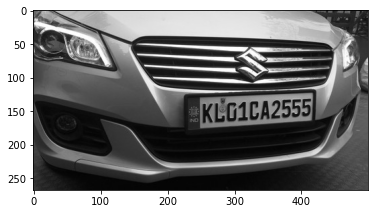

In [4]:
img = cv2.imread(r"Cars0.png")
imggray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(imggray,cv2.COLOR_BGR2RGB))

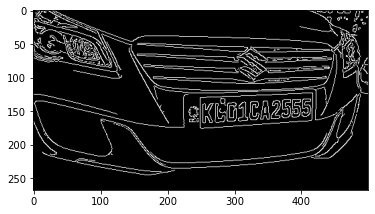

In [5]:
bfilter = cv2.bilateralFilter(imggray,11,17,17)#noise reduction
imgcanny = cv2.Canny(bfilter,30,200)#Edge Detection
plt.imshow(cv2.cvtColor(imgcanny,cv2.COLOR_BGR2RGB))

In [6]:
keypoints = cv2.findContours(imgcanny.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours,key=cv2.contourArea, reverse = True)[:10]# returning top 10 contoours
print(contours)

[array([[[401, 123]],

       [[400, 124]],

       [[380, 124]],

       [[379, 125]],

       [[357, 125]],

       [[356, 126]],

       [[333, 126]],

       [[332, 127]],

       [[310, 127]],

       [[309, 128]],

       [[282, 128]],

       [[281, 129]],

       [[259, 129]],

       [[258, 130]],

       [[249, 130]],

       [[249, 175]],

       [[250, 175]],

       [[251, 176]],

       [[254, 176]],

       [[255, 175]],

       [[269, 175]],

       [[270, 174]],

       [[283, 174]],

       [[284, 173]],

       [[298, 173]],

       [[299, 172]],

       [[312, 172]],

       [[313, 171]],

       [[327, 171]],

       [[328, 170]],

       [[341, 170]],

       [[342, 169]],

       [[354, 169]],

       [[355, 168]],

       [[368, 168]],

       [[369, 167]],

       [[381, 167]],

       [[382, 166]],

       [[394, 166]],

       [[395, 165]],

       [[410, 165]],

       [[411, 164]],

       [[415, 164]],

       [[415, 163]],

       [[416, 162]],

       [[

In [7]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour,15,True) #approximate the polygon from contour
    if len(approx) == 4:
        location = approx
        break


In [8]:
print(location)

[[[417 123]]

 [[249 130]]

 [[249 175]]

 [[415 164]]]


In [9]:
mask = np.zeros(imggray.shape, np.uint8)
# if len(contours) > 0:
#     cnt=contours[len(contours)-1]
new_image = cv2.drawContours(mask,[location],0,255,-1)
new_image = cv2.bitwise_and(img,img,mask = mask)
cv2.imshow('output',new_image)
cv2.waitKey() #image will not show until this is called
cv2.destroyWindow('HelloWorld')

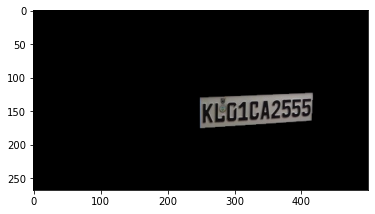

In [10]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [11]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x), np.min(y))
(x2,y2) = (np.max(x), np.max(y))
cropped_image = imggray[x1:x2+1, y1:y2+1]

In [12]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


C:\Users\Naman\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[([[0, 0], [169, 0], [169, 53], [0, 53]], 'KL01CA2555', 0.5244985964854458)]